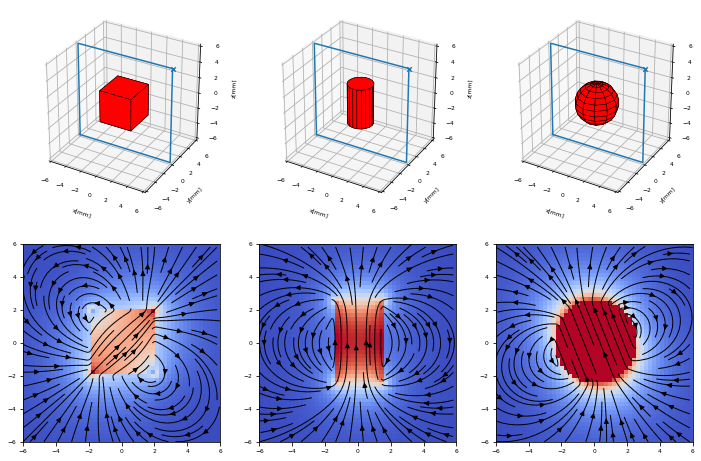

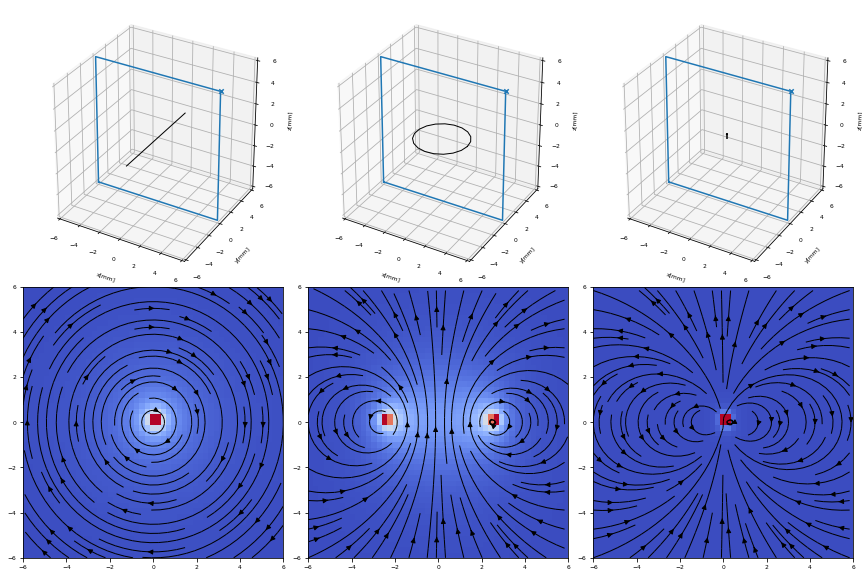

In [3]:
import magpylib as magpy
import numpy as np
from matplotlib import pyplot as plt

# set font size and define figures
plt.rcParams.update({'font.size': 6})

fig1 = plt.figure(figsize=(12, 8))
axsA = [fig1.add_subplot(2,3,i, projection='3d') for i in range(1,4)]
axsB = [fig1.add_subplot(2,3,i) for i in range(4,7)]

fig2 = plt.figure(figsize=(12, 8))
axsA += [fig2.add_subplot(2,3,i, projection='3d') for i in range(1,4)]
axsB += [fig2.add_subplot(2,3,i) for i in range(4,7)]

# position grid
ts = np.linspace(-6,6,50)
posis = np.array([(x,0,z) for z in ts for x in ts])
X,Y = np.meshgrid(ts,ts)

# create the source objects
s1 = magpy.source.magnet.Box(mag=[500,0,500], dim=[4,4,4])                #Box
s2 = magpy.source.magnet.Cylinder(mag=[0,0,500], dim=[3,5])               #Cylinder
s3 = magpy.source.magnet.Sphere(mag=[-200,0,500], dim=5)                  #Sphere
s4 = magpy.source.current.Line(curr=10, vertices=[(0,-5,0),(0,5,0)])      #Line
s5 = magpy.source.current.Circular(curr=10, dim=5)                        #Circular
s6 = magpy.source.moment.Dipole(moment=[0,0,100])                         #Dipole

for i,s in enumerate([s1,s2,s3,s4,s5,s6]):

    # display system on respective axes, use marker to zoom out
    magpy.displaySystem(s,subplotAx=axsA[i],markers=[(6,0,6)],suppress=True)
    axsA[i].plot([-6,6,6,-6,-6],[0,0,0,0,0],[-6,-6,6,6,-6])

    # plot field on respective axes
    B = np.array([s.getB(p) for p in posis]).reshape(50,50,3)
    axsB[i].pcolor(X,Y,np.linalg.norm(B,axis=2),cmap=plt.cm.get_cmap('coolwarm'))   # amplitude
    axsB[i].streamplot(X, Y, B[:,:,0], B[:,:,2], color='k',linewidth=1)             # field lines

plt.show()